# Chapter04. 좋은 훈련 세트 만들기 : 데이터 전처리

<주제>
* 데이터셋에서 누락된 값을 제거하거나 대체
* 머신 러닝 알고리즘을 위해 범주형 데이터 변환
* 모델과 관련이 높은 특성 선택

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#4.1-누락된-데이터-다루기" data-toc-modified-id="4.1-누락된-데이터-다루기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>4.1 누락된 데이터 다루기</strong></a></span><ul class="toc-item"><li><span><a href="#4.1.1-테이블-형태-데이터에서-누락된-값-식별" data-toc-modified-id="4.1.1-테이블-형태-데이터에서-누락된-값-식별-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>4.1.1 테이블 형태 데이터에서 누락된 값 식별</strong></a></span></li><li><span><a href="#4.1.2-누락된-값이-있는-샘플이나-특성-제외" data-toc-modified-id="4.1.2-누락된-값이-있는-샘플이나-특성-제외-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong>4.1.2 누락된 값이 있는 샘플이나 특성 제외</strong></a></span></li><li><span><a href="#4.1.3-누락된-값-대체" data-toc-modified-id="4.1.3-누락된-값-대체-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><strong>4.1.3 누락된 값 대체</strong></a></span></li><li><span><a href="#4.1.4-사이킷런-추정기-API-익히기" data-toc-modified-id="4.1.4-사이킷런-추정기-API-익히기-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4.1.4 사이킷런 추정기 API 익히기</a></span></li></ul></li><li><span><a href="#4.2-범주형-데이터-다루기" data-toc-modified-id="4.2-범주형-데이터-다루기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>4.2 범주형 데이터 다루기</strong></a></span><ul class="toc-item"><li><span><a href="#4.2.1-순서가-있는-특성과-순서가-없는-특성" data-toc-modified-id="4.2.1-순서가-있는-특성과-순서가-없는-특성-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>4.2.1 순서가 있는 특성과 순서가 없는 특성</strong></a></span></li><li><span><a href="#4.2.1-순서-특성-매핑" data-toc-modified-id="4.2.1-순서-특성-매핑-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong>4.2.1 순서 특성 매핑</strong></a></span></li><li><span><a href="#4.2.3-클래스-레이블-인코딩" data-toc-modified-id="4.2.3-클래스-레이블-인코딩-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><strong>4.2.3 클래스 레이블 인코딩</strong></a></span></li><li><span><a href="#4.2.4-순서가-없는-특성에-원-핫-인코딩-적용" data-toc-modified-id="4.2.4-순서가-없는-특성에-원-핫-인코딩-적용-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><strong>4.2.4 순서가 없는 특성에 원-핫 인코딩 적용</strong></a></span></li></ul></li><li><span><a href="#4.3-데이터셋을-훈련-세트와-테스트-세트로-나누기" data-toc-modified-id="4.3-데이터셋을-훈련-세트와-테스트-세트로-나누기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>4.3 데이터셋을 훈련 세트와 테스트 세트로 나누기</strong></a></span></li><li><span><a href="#4.4-특성-스케일-맞추기" data-toc-modified-id="4.4-특성-스케일-맞추기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>4.4 특성 스케일 맞추기</strong></a></span></li><li><span><a href="#4.5-유용한-특성-선택" data-toc-modified-id="4.5-유용한-특성-선택-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>4.5 유용한 특성 선택</strong></a></span><ul class="toc-item"><li><span><a href="#4.5.1-모델-복잡도-제한을-위한-L1-규제와-L2-규제" data-toc-modified-id="4.5.1-모델-복잡도-제한을-위한-L1-규제와-L2-규제-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>4.5.1 모델 복잡도 제한을 위한 L1 규제와 L2 규제</a></span></li><li><span><a href="#4.5.2-L2-규제의-기하학적-해석" data-toc-modified-id="4.5.2-L2-규제의-기하학적-해석-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>4.5.2 L2 규제의 기하학적 해석</a></span></li><li><span><a href="#4.5.3-L1-규제를-사용한-희소성" data-toc-modified-id="4.5.3-L1-규제를-사용한-희소성-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>4.5.3 L1 규제를 사용한 희소성</a></span></li><li><span><a href="#4.5.4-순차-특성-선택-알고리즘" data-toc-modified-id="4.5.4-순차-특성-선택-알고리즘-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span><strong>4.5.4 순차 특성 선택 알고리즘</strong></a></span></li></ul></li><li><span><a href="#4.6-랜덤-포레스트의-특성-중요도-사용" data-toc-modified-id="4.6-랜덤-포레스트의-특성-중요도-사용-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>4.6 랜덤 포레스트의 특성 중요도 사용</strong></a></span></li></ul></div>

## **4.1 누락된 데이터 다루기**

### **4.1.1 테이블 형태 데이터에서 누락된 값 식별**

CSV 파일로부터 간단한 예제 데이터셋 만들기

In [ ]:
import pandas as pd
from io import StringIO

In [ ]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# isnull 메서드 : 셀이 수치 값을 담고 있는지(False) 또는 누락되어 있는지(True)를 나타내는 데이터프레임 반환
# sum() 메서드 : 누락된 값의 개수 반환
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

### **4.1.2 누락된 값이 있는 샘플이나 특성 제외**

In [ ]:
df.dropna(axis=0)  # 누락된 값이 있는 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df.dropna(axis=1) # 누락된 값이 있는 열 삭제

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
df.dropna(how='all') # 모든 열이 NaN일 때 행 삭제
# 결과 : 모든 열이 결측값인 행이 없어 전체 행 반환

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.dropna(thresh=4)   # 실수 값이 네 개보다 작은 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df.dropna(subset=['C'])  # C열에 NaN이 있는 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### **4.1.3 누락된 값 대체**

보간 기법 : 데이터셋에 있는 다른 훈련 샘플로부터 누락된 값 추정 가능

* 평균으로 대체

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

### 4.1.4 사이킷런 추정기 API 익히기

Imputer 클래스의 데이터 변환에 사용하는 사이킷런의 변환기 클래스. 

* fit 메서드 : 훈련 데이터에서 모델 파라미터 학습
* transform 메서드 : 학습한 파라미터로 데이터를 변환
* predict 메서드 : 새로운 데이터 샘플에 대한 예측 생성

## **4.2 범주형 데이터 다루기**

### **4.2.1 순서가 있는 특성과 순서가 없는 특성**

예제 데이터셋 생성

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame([
                   ['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


순서가 없는 특성은 color, 순서가ㅏ 있는 특성은 size, 수치형 특성은 price가 있다.

### **4.2.1 순서 특성 매핑**

In [ ]:
# 매핑 함수
size_mapping = {
    'XL' : 3,
    'L' : 2,
    'M' : 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### **4.2.3 클래스 레이블 인코딩**

enumerate를 이용해 클래스 레이블을 0부터 할당(클래스 레이블은 순서가 없다.)

In [ ]:
import numpy as np

In [ ]:
class_mapping = {label:idx for idx, label in
                 enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

매핑 딕셔너리를 이용해 클레스 레이블을 정수로 변환

In [ ]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


* 사이킷런에 구현된 LabelEncoder 클래스 사용

fit_transform 메서드는 fit 메서드와 transform 메서드를 합쳐 놓은 것

In [ ]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

### **4.2.4 순서가 없는 특성에 원-핫 인코딩 적용**

위에서 순서가 있는 size 특성을 정수로 변환한 것처럼 순서가 없는 color 특성에도 비슷한 방식 사용

In [ ]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

* 원-핫 인코딩 기법 사용

get_dummies 메서드 : 문자열 ㅇ려만 반환하고 나머지 열은 그대로 둔다.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

oh_enc = OneHotEncoder(categories='auto')
col_trans = ColumnTransformer([('oh_enc', oh_enc, [0])], remainder='passthrough')
col_trans.fit_transform(X)

pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


## **4.3 데이터셋을 훈련 세트와 테스트 세트로 나누기**

wine 데이터셋 : 178개의 와인 샘플과 여러 가지 화학 성분을 나타내는 13개의 특성으로 구성

In [1]:
import numpy as np
import pandas as pd

df_wine = pd.read_csv('wine.data',header = None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity odf ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
print('클래스 레이블', np.unique(df_wine['Class label']))
df_wine.head()

클래스 레이블 [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity odf ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


사이킷런의 model_selection 모듈에 있는 train_test_split 함수를 이용해 데이터셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
  train_test_split(X, y,
                   test_size=0.3,
                   random_state=0,
                   stratify=y)

## **4.4 특성 스케일 맞추기**

**최소-최대 스케일 변환을 통한 정규화** : 범위가 정해진 값이 필요할 때 유용하게 사용할 수 있는 일반적인 기법 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

표준화와 정규화 예제

In [ ]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('표준화:', (ex-ex.mean()) / ex.std())
print('정규화:', (ex-ex.min()) / (ex.max()-ex.min()))

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화: [0.  0.2 0.4 0.6 0.8 1. ]


**표준화를 위한 클래스**

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## **4.5 유용한 특성 선택**

<일반화 오차를 감소하기 위해 사용하는 방법>
* 더 많은 훈련 세트 모으기
* 규제를 통해 복잡도 제한
* 파라미터 개수가 적은 간단한 모델 선택
* 데이터 차원 줄이기

### 4.5.1 모델 복잡도 제한을 위한 L1 규제와 L2 규제

L2 규제와 반대로 L1 규제는 보통 희소한 특성 벡터를 생성해 대부분의 특성 가중치가 0이 된다. 

### 4.5.2 L2 규제의 기하학적 해석

L2 규제는 비용 함수에 패널티 항을 추가해 규제가 없는 비용 함수로 훈련한 모델에 비해 가중치 값을 아주 작게 만드는 효과를 나타낸다. 

목적 : 규제가 없는 비용과 패널티항의 합을 최소화하는 것

즉, 모델을 학습할 만한 충분한 훈련 데이터가 없을 때 편향을 추가해 모델을 간단하게 만들어 분산을 줄이는 것.

### 4.5.3 L1 규제를 사용한 희소성

In [ ]:
# penalty 변수를 l1으로 지정해 희소한 모델 생성
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l1',
                        C=1.0, random_state=42)
lr.fit(X_train_std, y_train)

print('훈련 정확도 : ', lr.score(X_train_std, y_train))
print('테스트 정확도 : ', lr.score(X_test_std, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  1.0


결과 : 모델이 두 데이터셋에 완벽하게 작동함

In [ ]:
lr.intercept_  # 절편 확인

array([-1.26341605, -1.21598985, -2.3701943 ])

In [ ]:
lr.coef_  # 클래스마다 벡터 하나씩 세 개의 행이 있는 가중치 배열

array([[ 1.24579421,  0.18061164,  0.74359352, -1.16112462,  0.        ,
         0.        ,  1.16957619,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54788874,  2.51037422],
       [-1.53699942, -0.38746609, -0.99525191,  0.36498543, -0.05970899,
         0.        ,  0.6678873 ,  0.        ,  0.        , -1.93417045,
         1.23366592,  0.        , -2.23177895],
       [ 0.13562632,  0.16843221,  0.3572171 ,  0.        ,  0.        ,
         0.        , -2.43829335,  0.        ,  0.        ,  1.56374546,
        -0.81900707, -0.49232727,  0.        ]])

규제 강도를 달리한 가중치 변화 그래프

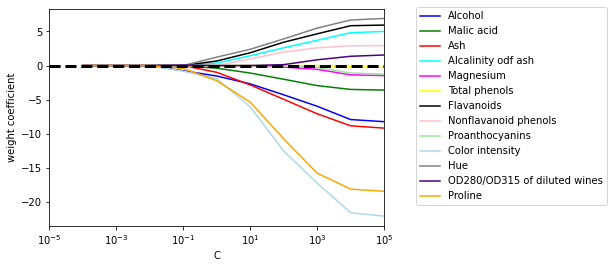

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
          
weights, params = [], []

for c in np.arange(-4., 6.):
  lr = LogisticRegression(solver='liblinear', multi_class='auto',
                          penalty='l1', C=10.**c,
                          random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column],
           label=df_wine.columns[column + 1],
           color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')

ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

### **4.5.4 순차 특성 선택 알고리즘**

SBS 알고리즘

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

사이킷런의 KNN 분류기를 사용해 SBS 구현

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

KNN 분류기의 정확도 시각화

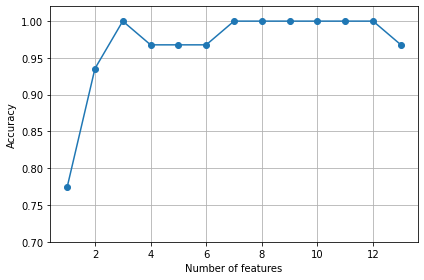

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 특성을 선택합니다.
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 특성 조합의 성능 그래프를 출력합니다.
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

결과 : 특성 개수가 줄었을 때 검증 세트에서 KNN 분류기의 정확도 향상 (차원의 저주가 감소하기 때문)

In [ ]:
# 가장 작은 개수의 조합(k=3)에서 높은 검증 세트 성능을 내는 특성 확인
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


KNN 분류기의 성능 평가

In [ ]:
knn.fit(X_train_std, y_train)
print('훈련 정확도:', knn.score(X_train_std, y_train))
print('테스트 정확도:', knn.score(X_test_std, y_test))

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629


선택된 세 개의 특성에서 KNN 성능 확인

In [ ]:
knn.fit(X_train_std[:, k3], y_train)
print('훈련 정확도:', knn.score(X_train_std[:, k3], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, k3], y_test))

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


특성을 줄여 KNN 모델의 성능이 증가하진 않았지만 데이터셋 크기는 줄었다. 

또 특성 개수를 크게 줄였기 때문에 더 간단한 모델을 얻어 해석하기 쉽다.

## **4.6 랜덤 포레스트의 특성 중요도 사용**

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity odf ash             0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


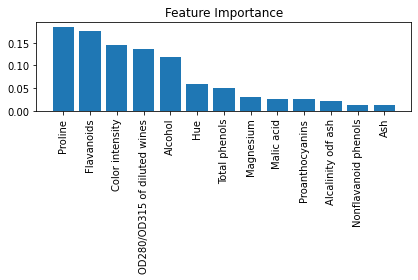

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Wine 데이터셋 특성의 상대적인 중요도에 따른 순위 그래프로 시각화

특성 중요도는 합이 1이 되도록 정규화된 값